### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

**Due Date: March 1, 2022, BEFORE the beginning of class at 2:00pm ET**

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://techcrunch.com/wp-content/uploads/2018/10/shark-tank.jpg?w=730&crop=1" width="400px"> 

After the previous three case studies,  your team is now equipped with a powerful set of data science skills. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a service/solution, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include:
  1. The use of Twitter data
  1. The use of at least one other data set to combine with the Twitter data
  1. The use of cloud resources
  1. A 90 second elevator pitch
  1. The normal longer present with a demo of your product
* NOTE, as opposed to the first three case studies, case study 5 is much more open ended.  
  * Business is the focus
  * The precise balance of the various things we learned in class is up to you.

# Background about Elevator Pitch (90 seconds) and Shark Tank

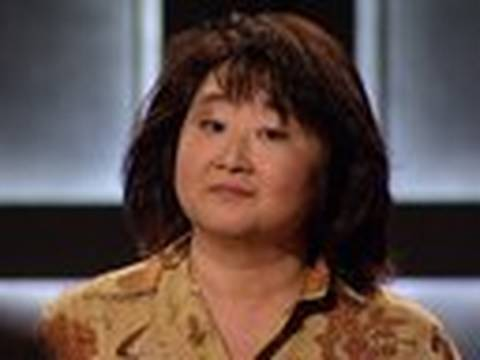

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.


In [ ]:
! pip install pymongo
! pip install dnspython
! pip install twitter
! pip install geopandas
! pip install scikit-learn

import sys
import numpy as np
import pandas as pa
import sklearn
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction import DictVectorizer


In [ ]:
import pymongo
client = pymongo.MongoClient("mongodb+srv://CaseStudy:i<3datascience@ds3010.6mcnk.mongodb.net/caseStudy2DB?retryWrites=true&w=majority")


In [ ]:
import twitter

# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'vS5IZ3UlRACBL6mZPSrTcZnLJ'

CONSUMER_SECRET = '9v2hnmCAdzq8ey7nb638KSxTa88jM1sNeHDNRsHtUhL4J9KJTY'

OAUTH_TOKEN = '571213367-wzPqnjCPnQ8NQfTvtVeZRGOoROZsa6feBWHRMrAY'

OAUTH_TOKEN_SECRET = 'IAl7PqHjBUVKgwUMp9LQznz1e4XfbG2VE0aqDfHEXTlyh'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

#mongoDB
import pymongo
client = pymongo.MongoClient("mongodb+srv://CaseStudy:i<3datascience@ds3010.6mcnk.mongodb.net/caseStudy2DB?retryWrites=true&w=majority")
db = client['caseStudy2DB']

#collect tweets
import json
q = 'NFL'
count = 1000
search_results = twitter_api.search.tweets(q=q, count=count)
#print(search_results)

statuses = search_results['statuses']
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        

    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Reference a particular collection in the database
coll = db['_NFL']

# Write data to mongoDB
data = coll.insert_many(statuses)

q = 'MLB'
count = 1000
search_results = twitter_api.search.tweets(q=q, count=count)
#print(search_results)

statuses = search_results['statuses']
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        

    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Reference a particular collection in the database
coll = db['_MLB']

# Write data to mongoDB
data = coll.insert_many(statuses)

q = 'NBA'
count = 1000
search_results = twitter_api.search.tweets(q=q, count=count)
#print(search_results)

statuses = search_results['statuses']
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        

    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Reference a particular collection in the database
coll = db['_NBA']

# Write data to mongoDB
data = coll.insert_many(statuses)

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 492
Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500


### Problem 1 (20 points): the Business Part 
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

For our business problem, we wanted to find the most popular NBA players and teams to help decide which players and teams to make the most sports merchandise for. This is an important problem to solve so companies can stock merchandise that is more likely to sell, which will prevent losing money from buying merchandise that won’t sell as much. We can make a big difference with data science technology since we are able to search through tweets people have posted regarding the NBA, NBA teams, and NBA players and analyze their sentiments to determine the popularity of a team or player. Investors should buy in our idea because the market for sports merchandise is about 45 trillion dollars, and our product can save companies a lot of money.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the investment of the "sharks"?






### Problem 2 (20 points): The Data Part 

Define how Twitter data and at least one other dataset can be combined to make a Data Science product.

In [ ]:
# your code here

# Twitter data and other datasets can be used together to create a data science product in several ways. 
# Combining these various forms of data can provide us with additional information to do more analysis,
# and also allows us to be more specific in our analysis.

#	We found a dataset that supplied us with the names of the NBA players and the cities where the teams were from, for 2022. 
# To use this dataset with our Twitter data, we first had to download it as an excel sheet. 
# At this stage, we looked at the city name column which originally displayed the city names as three letter encodings.
# We decided to modify this column to include the full city name to make it easier to read and search through with our demo.
# From there, we downloaded it as a csv file and then copied and pasted the csv file into a txt file so we could easily
# read the data into our python notebook. This dataset enabled us to connect the team name entered in the demo with
# the players that belong to that team. With the player names, we were able to gather the data on the top five
# players for the team entered, instead of just tweets that mentioned the team.



### Problem 3 (20 points): The Demo Part  


Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

sentimentAnalysis.txt was made from combining three texts files from this dataset: 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

In [ ]:
! wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
! tar xzf review_polarity.tar.gz
! ls


--2022-02-26 18:36:35--  https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  6.08MB/s    in 0.5s    

2022-02-26 18:36:36 (6.08 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]

NBAPlayerStats.txt  review_polarity.tar.gz  txt_sentoken
poldata.README.2.0  sample_data


In [ ]:
dataset = load_files('txt_sentoken/', shuffle=False)
print("n_samples: %d" % len(dataset.data))

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

n_samples: 2000


In [ ]:
vectorizer = TfidfVectorizer(min_df=3, max_df=.95, ngram_range=(1,7))
trained = vectorizer.fit(docs_train)

xtrain = trained.transform(docs_train)

NBA Player Stats dataset is from: https://www.nbastuffer.com/2021-2022-nba-player-stats/  

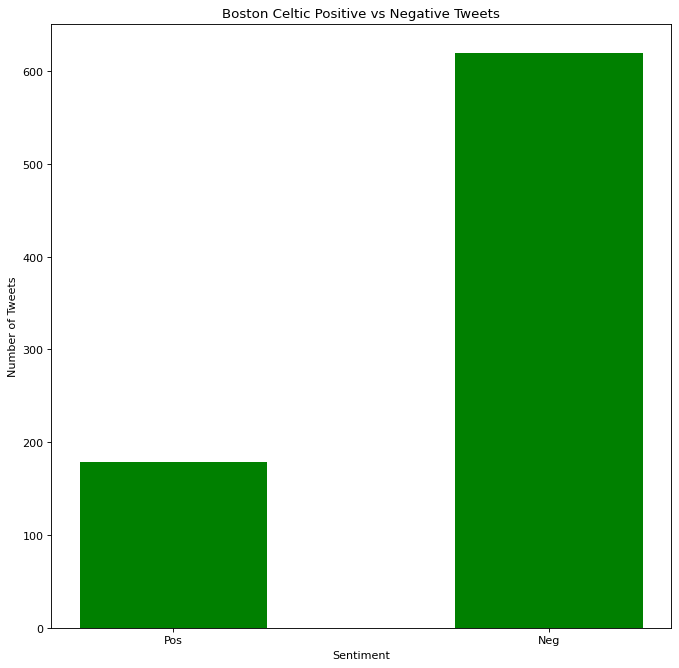

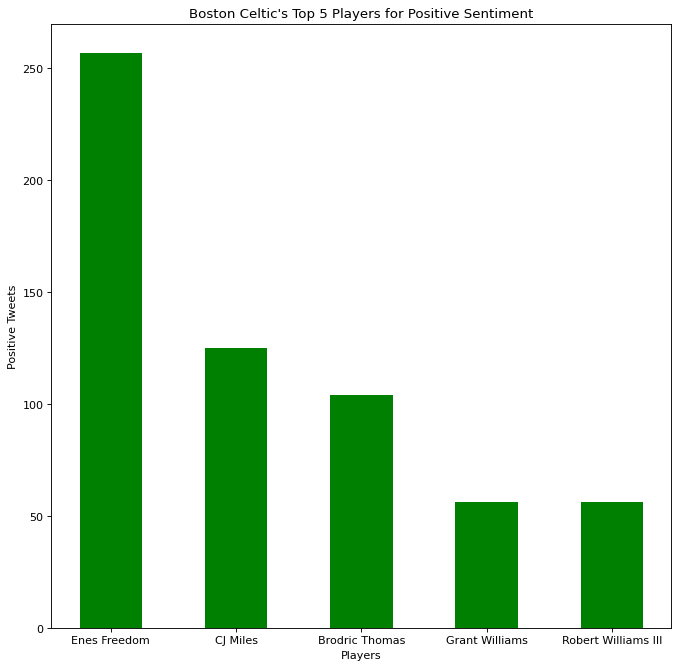

In [13]:
import pymongo
import csv
from heapq import nlargest
from matplotlib.pyplot import figure


client = pymongo.MongoClient("mongodb+srv://CaseStudy:i<3datascience@ds3010.6mcnk.mongodb.net/caseStudy2DB?retryWrites=true&w=majority")
db = client['caseStudy2DB']
coll = db['_NBA']


def getPlayers(city):
  players = [];
  with open('NBAPlayerStats.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if(row[1] == city):
              players.append(row[0]);
            line_count += 1
  return players

def getPlayerData(player):
    player_data = coll.find({'text':  {'$regex': '.*'+player+'.*', '$options': 'i' }})
    status_texts = [ status['text']
                    for status in player_data]

    if(len(status_texts)!=0):
        xtest2 = trained.transform(status_texts)

        linear = LinearSVC()
        fittedLinear = linear.fit(xtrain, y_train)
        predicted = fittedLinear.predict(xtest2)

        pos_neg = posNeg(predicted)
        positive = pos_neg[0]
        negative = pos_neg[1]
        return pos_neg
    else:
        return [0,0]

def posNeg(prediction):
    posCount = 0
    negCount = 0
    for pred in prediction:
      if(pred == 0):
        negCount += 1
      else:
        posCount += 1
    return [posCount, len(prediction)]

def top5Players(players, playerResults):
  playerDict = {}
  top5PlayerDict = {}
  N = 5
  for i in range(len(players)):
    playerDict[players[i]] = playerResults[i]

  result = nlargest(N, playerDict, key = playerDict.get)

  for r in result:
    ratio = playerDict.get(r)
    top5PlayerDict[r] = ratio
  return top5PlayerDict


def teamData(city, team):
    team_data = coll.find({'text':  {'$regex': '.*'+team+'.*', '$options': 'i' }})
    status_texts = [ status['text']
                    for status in team_data]
    
    xtest = trained.transform(status_texts)

    linear = LinearSVC()
    fittedLinear = linear.fit(xtrain, y_train)
    predicted = fittedLinear.predict(xtest)

    pos_neg = posNeg(predicted)
    positive = pos_neg[0]
    negative = pos_neg[1]


    figure(figsize=(10, 10), dpi=80)

    plt.bar(["Pos","Neg"], pos_neg, color ='green',
        width = 0.5)
 
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Tweets")
    plt.title(city+" "+team+" Positive vs Negative Tweets")
    plt.show()

    players = getPlayers(city)
    playerResults = []
    for p in players:
      name = p.split()
      pResult = getPlayerData(name[1])
      posResult = pResult[0]
      playerResults.append(posResult)

    top5 = top5Players(players,playerResults)

    figure(figsize=(10, 10), dpi=80)
    plt.bar(top5.keys(), top5.values(), color ='green',
        width = 0.5)
 

    plt.xlabel("Players")
    plt.ylabel("Positive Tweets")
    plt.title(city+" "+team+"'s Top 5 Players for Positive Sentiment")
    plt.show()

results = teamData('Boston', 'Celtic')


### Problem 4 (20 points): Prepare a 90 second Pitch and *present* it in the class 

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

**Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!)**



# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 15 minute presentation.

* Report: please prepare a report (less than 10 pages) to report what you found in the data and how data supports you product idea.

  * What data you collected?

  * How does this data support your product idea?

  * How did you analyse the data?

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through canvas.wpi.edu.

### DS3010 Case Study 4 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

**Totoal Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 20
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 20
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 20
    -----------------------------------
  
    -----------------------------------
    Question 4:  90 second product pitch
    Points: 20
    -----------------------------------
      
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for 15 minutes of presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
